In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sn

In [2]:
book_df = pd.read_csv('book.csv',encoding='latin-1')

In [3]:
book_df

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [4]:
bookss = book_df.iloc[:,1:]

In [5]:
index_book_df=book_df.drop(['Unnamed: 0'], axis=1)
index_book_df

,User.ID,Book.Title,Book.Rating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6
...,...,...,...
9995,162121,American Fried: Adventures of a Happy Eater.,7
9996,162121,Cannibal In Manhattan,9
9997,162121,How to Flirt: A Practical Guide,7
9998,162121,Twilight,8


In [6]:
bookss.columns = ['userID', 'title', 'bookRating']
bookss.head()

,userID,title,bookRating
0,276726,Classical Mythology,5
1,276729,Clara Callan,3
2,276729,Decision in Normandy,6
3,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,276737,The Mummies of Urumchi,6


In [7]:
print('# of records: %d\n# of books: %d\n# of users: %d' % (len(bookss), len(bookss['title'].unique()), len(bookss['userID'].unique())))

# of records: 10000
# of books: 9659
# of users: 2182


In [8]:
palette = sn.color_palette("RdBu", 10)

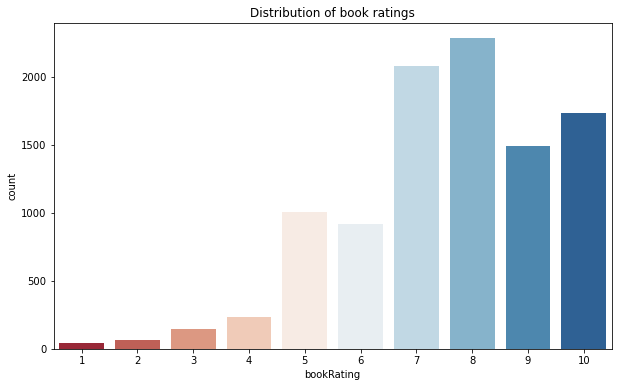

In [9]:
fig, ax = plot.subplots(figsize = (10, 6))
sn.countplot(x = 'bookRating', data = bookss, palette = palette)
ax.set_title('Distribution of book ratings')

plot.show()

In [10]:
index_book_df=book_df.rename({'User.ID':'userid','Unnamed: 0':'index','Book.Title':'bookTitle','Book.Rating':'bookRating'},axis=1)
index_book_df

,index,userid,bookTitle,bookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [11]:
index_book_df[index_book_df.duplicated()]

,index,userid,bookTitle,bookRating


In [12]:
index_book_df[index_book_df.duplicated(subset=["userid","bookTitle"])]

,index,userid,bookTitle,bookRating
2001,2002,278418,White Oleander : A Novel,5
3792,3793,1211,Black House,9
4745,4746,2033,The First Time,2
5051,5052,2152,Le nouveau soleil de Teur,7
5219,5220,2276,In the Beauty of the Lilies,10
7439,7440,3757,The Magician's Tale,7
9945,9946,162052,Rose,8


In [13]:
bookclean=index_book_df.drop_duplicates(subset=["userid","bookTitle"])
bookclean

,index,userid,bookTitle,bookRating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6
...,...,...,...,...
9995,9996,162121,American Fried: Adventures of a Happy Eater.,7
9996,9997,162121,Cannibal In Manhattan,9
9997,9998,162121,How to Flirt: A Practical Guide,7
9998,9999,162121,Twilight,8


In [14]:
index_book_df.sort_values('userid')

,index,userid,bookTitle,bookRating
2401,2402,8,Wings,5
2400,2401,8,The Western way: A practical guide to the West...,5
2399,2400,8,Ancient Celtic Romances,5
2402,2403,8,Truckers,5
2405,2406,8,The Art Of Celtia,7
...,...,...,...,...
2395,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
2398,2399,278854,Celtic Mythology (Library of the World's Myths...,8
2393,2394,278854,A corrente de Trewis Scott,7
2394,2395,278854,As valkÃ­rias,7


In [15]:
len(index_book_df['userid'].unique())

2182

In [16]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [17]:
books_reader=bookclean.pivot(index='userid',columns='bookTitle',values='bookRating').reset_index(drop=True)

In [18]:
books_reader

bookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
2180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
books_reader.fillna(0, inplace=True)
books_reader

bookTitle,"Jason, Madison &amp",Other Stories;Merril;1985;McClelland &amp,Repairing PC Drives &amp,'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",...,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi,stardust,Ã?Â?bermorgen.
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2178,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
2180,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine,correlation

In [21]:
reader_sim =1-pairwise_distances(books_reader.values,metric='cosine')
reader_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
reader_sim_df=pd.DataFrame(reader_sim)

In [23]:
reader_sim_df.index=bookclean.userid.unique()
reader_sim_df.columns=bookclean.userid.unique()

In [24]:
reader_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,1.0,0.0,0.0,0.0,0.0
276729,0.0,1.0,0.0,0.0,0.0
276736,0.0,0.0,1.0,0.0,0.0
276737,0.0,0.0,0.0,1.0,0.0
276744,0.0,0.0,0.0,0.0,1.0


In [25]:
np.fill_diagonal(reader_sim, 0)
reader_sim_df.iloc[0:5, 0:5]

,276726,276729,276736,276737,276744
276726,0.0,0.0,0.0,0.0,0.0
276729,0.0,0.0,0.0,0.0,0.0
276736,0.0,0.0,0.0,0.0,0.0
276737,0.0,0.0,0.0,0.0,0.0
276744,0.0,0.0,0.0,0.0,0.0


In [26]:
reader_sim_df.idxmax(axis=1)[0:5]

276726    276726
276729    276726
276736    276726
276737    276726
276744    276726
dtype: int64

In [27]:
bookclean[(bookclean['userid']==276726) |(bookclean['userid']==276744)]

,index,userid,bookTitle,bookRating
0,1,276726,Classical Mythology,5
5,6,276744,The Kitchen God's Wife,7


In [28]:
reader_1=bookclean[bookclean['userid']==276726]
reader_1.bookTitle

0    Classical Mythology
Name: bookTitle, dtype: object

In [29]:
reader_2=bookclean[bookclean['userid']==276744]
reader_2.bookTitle

5    The Kitchen God's Wife
Name: bookTitle, dtype: object

In [30]:
pd.merge(reader_1,reader_2,on='bookTitle',how='outer')

,index_x,userid_x,bookTitle,bookRating_x,index_y,userid_y,bookRating_y
0,1.0,276726.0,Classical Mythology,5.0,NaN,NaN,NaN
1,NaN,NaN,The Kitchen God's Wife,NaN,6.0,276744.0,7.0
